In [1]:
import os, subprocess
import json
import uproot
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pandas as pd
import pickle
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/coffea/util.py:154: FutureWarning: In coffea version v0.8.0 (target date: 31 Dec 2022), this will be an error.
(Set coffea.deprecations_as_errors = True to get a stack trace now.)
ImportError: coffea.hist is deprecated
  warnings.warn(message, FutureWarning)


In [2]:
with open('lumi.json') as f:
    lumis = json.load(f)

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [3]:
year = '2017'
indir = "outfiles-plots/"
this_file = indir+year+"_dask_TTbar.coffea"

In [4]:
if os.path.isfile(this_file):
    outsum = util.load(this_file)
    print(outsum)
            
    scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
    outsum['cutflow'].scale(scale_lumi, 'dataset')
    cutflow = outsum['cutflow'].group('dataset', hist.Cat('process', 'Process'), pmap).sum('genflavor').integrate('process','ttbar').integrate('region',['signal-vbf'])

{'sumw': defaultdict_accumulator(<class 'float'>, {'TTTo2L2Nu': 7210981000.0, 'TTToHadronic': 31797965183.0, 'TTToSemiLeptonic': 30090885373.0, 'TTToSemiLeptonic_ext1': 7507639534.0}), 'cutflow': <Hist (dataset,region,msd1,genflavor,cut) instance at 0x7f82de2071f0>, 'btagWeight': Hist(Regular(50, 0, 3, name='val', label='BTag correction'), storage=Weight()) # Sum: WeightedSum(value=3.26244e+08, variance=3.26244e+08) (WeightedSum(value=3.26244e+08, variance=3.26244e+08) with flow), 'filltime': 1363.8831367492676, 'weightStats': {'genweight': WeightStatistics(sumw=76607471616.0, sumw2=22171858501632.0, minw=-316.46600341796875, maxw=316.46600341796875, n=326244180), 'pileup_weight': WeightStatistics(sumw=348391200.23975515, sumw2=411250907.5062411, minw=1.8103889340654745e-11, maxw=5.0, n=326244180), 'btagLightSF': WeightStatistics(sumw=326289027.9570462, sumw2=326385320.23874795, minw=0.9582856480987134, maxw=4.411865206238759, n=326244180), 'btagBCSF': WeightStatistics(sumw=325279657.9

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f82de207220>
  warnings.warn(


In [5]:
cutflow.sum('msd1').values()

{(): array([1.66411462e+06, 1.66411462e+06, 1.66411462e+06, 1.66159040e+06,
        1.46673892e+05, 1.46673892e+05, 5.42001717e+04, 2.88764768e+04,
        2.23781183e+04, 1.35515602e+04, 3.97881765e+02, 6.48236679e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])}

In [7]:
['none','trigger','lumimask','metfilter','minjetkin','jetid','n2ddt','antiak4btagMediumOppHem','met','noleptons','isvbf','ddbpass','empty','empty','empty']

['none',
 'trigger',
 'lumimask',
 'metfilter',
 'minjetkin',
 'jetid',
 'n2ddt',
 'antiak4btagMediumOppHem',
 'met',
 'noleptons',
 'isvbf',
 'ddbpass',
 'empty',
 'empty',
 'empty']

In [13]:
jetkin = cutflow.integrate('cut',int_range=slice(4,5))
n2ddt = cutflow.integrate('cut',int_range=slice(6,7))
nobjet = cutflow.integrate('cut',int_range=slice(7,8))
met = cutflow.integrate('cut',int_range=slice(8,9))
noleptons = cutflow.integrate('cut',int_range=slice(9,10))
isvbf = cutflow.integrate('cut',int_range=slice(10,11))
ddbpass = cutflow.integrate('cut',int_range=slice(11,12))

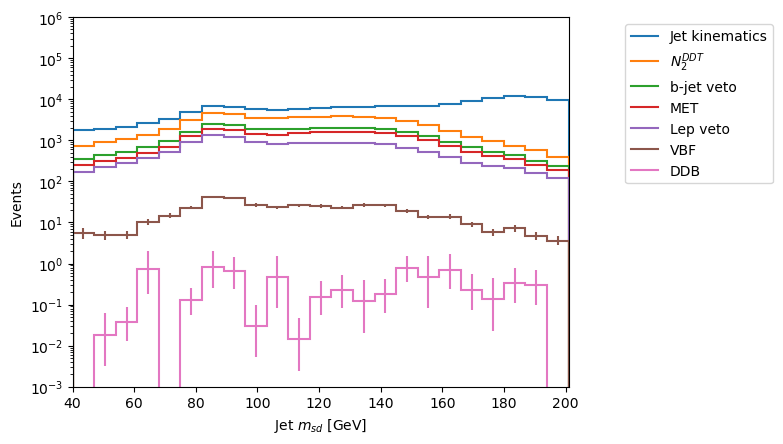

In [20]:
hist.plot1d(jetkin)
hist.plot1d(n2ddt)
hist.plot1d(nobjet)
hist.plot1d(met)
hist.plot1d(noleptons)
hist.plot1d(isvbf)
hist.plot1d(ddbpass)

plt.legend(labels=['Jet kinematics','$N_2^{DDT}$','b-jet veto','MET','Lep veto','VBF','DDB'],bbox_to_anchor=(1.1, 1))
plt.ylim(0.001,1000000)
plt.yscale('log')

(0.0, 0.02)

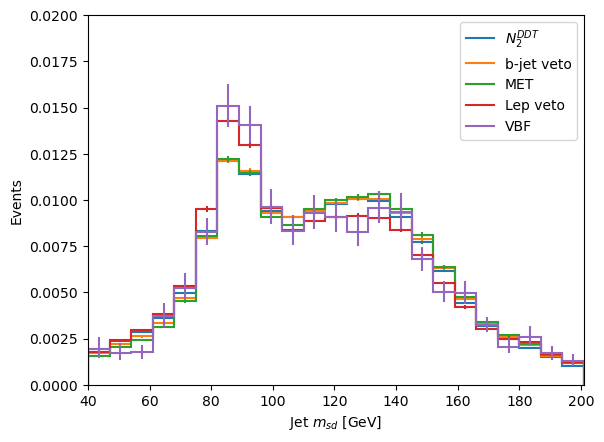

In [26]:
#hist.plot1d(jetkin,density=True)
hist.plot1d(n2ddt,density=True)
hist.plot1d(nobjet,density=True)
hist.plot1d(met,density=True)
hist.plot1d(noleptons,density=True)
hist.plot1d(isvbf,density=True)
#hist.plot1d(ddbpass,density=True)

plt.legend(labels=['$N_2^{DDT}$','b-jet veto','MET','Lep veto','VBF'])

plt.ylim(0,0.02)